*-- Author: NORA --*

## TEXT CLASSIFICATION  FOR  BBC NEWS 

In [2]:
import numpy as np
import pandas as pd
import nltk
import sklearn
import operator
import requests
nltk.download('stopwords') # If needed
nltk.download('punkt') # If needed
nltk.download('wordnet') # If needed
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msztaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msztaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msztaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
os.getcwd()
#path = "/Nora/bbc" # enter the location of folder name bbc
os.chdir(path)
os.getcwd()

NameError: name 'os' is not defined

### Load the data

# Reading Business files

In [4]:
import os
import re

path = "/Users/msztaj/Downloads/Nora/bbc"
os.chdir(path)

#get full path of txt file
filePath = []
for file in os.listdir("./business"):
    filePath.append(os.path.join("./business", file))

#pull file name from text file with regex, capturing the text before the .txt   
fileName = re.compile('\\\\(.*)\.txt')

#make empty dict Data with the key as the file name, and the value as the words in the file.
data = {}
for file in filePath:
    #capturing file name
    key = fileName.search(file)
    with open(file, "r") as readFile:
        # note that key[1] is the capture group from our search, and that the text is put into a list.
        data[key[1]] = [readFile.read()]

#make dataframe from dict, and rename columns.
df_business = pd.DataFrame(data).T.reset_index().rename(columns = {'index':'doc', 0:'sentence'})

df_business.head(5)

,doc,sentence
0,001,Ad sales boost Time Warner profit\n\nQuarterly...
1,002,Dollar gains on Greenspan speech\n\nThe dollar...
2,003,Yukos unit buyer faces loan claim\n\nThe owner...
3,004,High fuel prices hit BA's profits\n\nBritish A...
4,005,Pernod takeover talk lifts Domecq\n\nShares in...


# Reading Entertainment files

In [9]:
path = "/Users/msztaj/Downloads/Nora/bbc"
os.chdir(path)

#get full path of txt file
filePath = []
for file in os.listdir("./entertainment"):
    filePath.append(os.path.join("./entertainment", file))

#pull file name from text file with regex, capturing the text before the .txt   
fileName = re.compile('\\\\(.*)\.txt')

#make empty dict Data with the key as the file name, and the value as the words in the file.
data = {}
for file in filePath:
    #capturing file name
    key = fileName.search(file)
    with open(file, "r") as readFile:
        # note that key[1] is the capture group from our search, and that the text is put into a list.
        data[key[1]] = [readFile.read()]

#make dataframe from dict, and rename columns.
df_entertainment = pd.DataFrame(data).T.reset_index().rename(columns = {'index':'doc', 0:'sentence'})

df_entertainment.head(5)

,doc,sentence
0,001,Gallery unveils interactive tree\n\nA Christma...
1,002,Jarre joins fairytale celebration\n\nFrench mu...
2,003,Musical treatment for Capra film\n\nThe classi...
3,004,Richard and Judy choose top books\n\nThe 10 au...
4,005,Poppins musical gets flying start\n\nThe stage...


# Reading Politics files

In [6]:
path = "/Users/msztaj/Downloads/Nora/bbc"
os.chdir(path)

#get full path of txt file
filePath = []
for file in os.listdir("./politics"):
    filePath.append(os.path.join("./politics", file))

#pull file name from text file with regex, capturing the text before the .txt   
fileName = re.compile('\\\\(.*)\.txt')

#make empty dict Data with the key as the file name, and the value as the words in the file.
data = {}
for file in filePath:
    #capturing file name
    key = fileName.search(file)
    with open(file, "r") as readFile:
        # note that key[1] is the capture group from our search, and that the text is put into a list.
        data[key[1]] = [readFile.read()]

#make dataframe from dict, and rename columns.
df_politics = pd.DataFrame(data).T.reset_index().rename(columns = {'index':'doc', 0:'sentence'})

df_politics.head(5)

,doc,sentence
0,001,Labour plans maternity pay rise\n\nMaternity p...
1,002,Watchdog probes e-mail deletions\n\nThe inform...
2,003,Hewitt decries 'career sexism'\n\nPlans to ext...
3,004,Labour chooses Manchester\n\nThe Labour Party ...
4,005,Brown ally rejects Budget spree\n\nChancellor ...


# Reading Sports files

In [5]:
path = "/Users/msztaj/Downloads/Nora/bbc"
os.chdir(path)

#get full path of txt file
filePath = []
for file in os.listdir("./sport"):
    filePath.append(os.path.join("./sport", file))

#pull file name from text file with regex, capturing the text before the .txt   
fileName = re.compile('\\\\(.*)\.txt')

#make empty dict Data with the key as the file name, and the value as the words in the file.
data = {}
for file in filePath:
    #capturing file name
    key = fileName.search(file)
    with open(file, "r") as readFile:
        # note that key[1] is the capture group from our search, and that the text is put into a list.
        data[key[1]] = [readFile.read()]

#make dataframe from dict, and rename columns.
df_sports = pd.DataFrame(data).T.reset_index().rename(columns = {'index':'doc', 0:'sentence'})

df_sports.head(5)

,doc,sentence
0,001,Claxton hunting first major medal\n\nBritish h...
1,002,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,003,Greene sets sights on world title\n\nMaurice G...
3,004,IAAF launches fight against drugs\n\nThe IAAF ...
4,005,"Dibaba breaks 5,000m world record\n\nEthiopia'..."


# Reading Tech files

In [7]:
path = "/Users/msztaj/Downloads/Nora/bbc"
os.chdir(path)

#get full path of txt file
filePath = []
for file in os.listdir("./tech"):
    filePath.append(os.path.join("./tech", file))

#pull file name from text file with regex, capturing the text before the .txt   
fileName = re.compile('\\\\(.*)\.txt')

#make empty dict Data with the key as the file name, and the value as the words in the file.
data = {}
for file in filePath:
    #capturing file name
    key = fileName.search(file)
    with open(file, "r") as readFile:
        # note that key[1] is the capture group from our search, and that the text is put into a list.
        data[key[1]] = [readFile.read()]

#make dataframe from dict, and rename columns.
df_tech = pd.DataFrame(data).T.reset_index().rename(columns = {'index':'doc', 0:'sentence'})

df_tech.head(5)

,doc,sentence
0,001,Ink helps drive democracy in Asia\n\nThe Kyrgy...
1,002,China net cafe culture crackdown\n\nChinese au...
2,003,Microsoft seeking spyware trojan\n\nMicrosoft ...
3,004,Digital guru floats sub-$100 PC\n\nNicholas Ne...
4,005,Technology gets the creative bug\n\nThe hi-tec...


### Adding labels to the data

In [10]:
df_business['class'] = 'business'
df_entertainment['class'] = 'entert'
df_politics['class'] = 'polit'
df_sports['class'] = 'sports'
df_tech['class'] = 'tech'

print(len(df_business.index))
print(len(df_entertainment.index))
print(len(df_politics.index))
print(len(df_sports.index))
print(len(df_tech.index))

510
386
427
511
401


In [11]:
# df_tech
# df_sports
# df_politics
# df_entertainment
# df_business

### Combined dataset


In [11]:
df = pd.concat([df_business, df_entertainment, df_politics,df_sports, df_tech ])
print(len(df.index))
#df.head(5)

training_data = pd.DataFrame(df, columns=['sentence', 'class'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
#print(training_data.sentence.shape)
training_data.sentence.head(5)

2235


0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: sentence, dtype: object

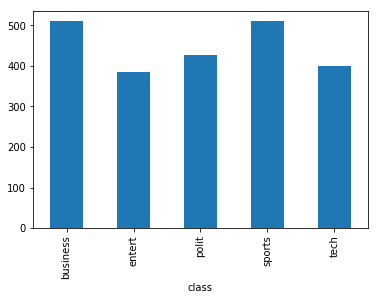

In [29]:
#df["category_id"] = df["class"].factorize()[0]
#df.groupby('class').category_id.count().plot.bar(ylim=0)

# Text pre processing

In [12]:
'''
Converting to lower-case
Removing punctuations and numbers
Remove blank spaces
'''
# To convert into lowercase
df.loc[:,"sentence"] = df.sentence.apply(lambda x : str.lower(x))

# To remove punctuation and numbers
#import re
df.loc[:,"sentence"] = df.sentence.apply(lambda x : " ".join(re.findall('[\w]+',x)))

# To remove white spaces in the text
# -----------------------------------
print ("Total Sentence: "+str(len(df))+"\n")
for sentence in df[:1]:
    sentence.strip()
    print (sentence) # or print (patient_line.strip())

#result = input_str.translate(string.maketrans(“”,””), string.punctuation)
#print(result)

df.tail(5)

Total Sentence: 2235

doc
sentence
class


,doc,sentence,class
396,397,bt program to beat dialler scams bt is introdu...,tech
397,398,spam e mails tempt net shoppers computer users...,tech
398,399,be careful how you code a new european directi...,tech
399,400,us cyber security chief resigns the man making...,tech
400,401,losing yourself in online gaming online role p...,tech


#### https://www.geeksforgeeks.org/python-lemmatization-with-nltk/https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

#### https://www.geeksforgeeks.org/python-nltk-nltk-tokenize-tabtokenizer/?ref=rp

# Feature selection

### Term freqency based feature selection

In [18]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.sentence)
#print(X_train_counts)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

X_train_tfidf

<2235x29421 sparse matrix of type '<class 'numpy.float64'>'
	with 451409 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['class'], test_size=0.25, random_state=42)
X_test

<559x29421 sparse matrix of type '<class 'numpy.float64'>'
	with 110941 stored elements in Compressed Sparse Row format>

### FEATURE SELECTION USING Chi-Square testing
#### for feature seleciton based on association of eahc words with one of five categories.


In [17]:
'''
The process of feature selection consists of selecting a subset of relevant features. 
In this project, we are going to use the [chi-squared test]
(https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) method, 
available in sklearn. This method basically removes the features that appear to be irrelevant to 
a given class (in our one of five vcateogries). 

''' 
                                                            
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

fs_chisq = SelectKBest(chi2, k=500).fit(X_train, y_train)
X_train_chisq_new = fs_chisq.transform(X_train)

X_train_chisq_new
X_train_new = SelectKBest(chi2, k=500).fit_transform(X_train, y_train)
X_train_new
#print ("Size original training matrix: "+str(X_train_sentanalysis.shape))
#print ("Size new training matrix: "+str(X_train_sentanalysis_new.shape))

<1676x500 sparse matrix of type '<class 'numpy.float64'>'
	with 42317 stored elements in Compressed Sparse Row format>

### Feature selectiom using tf-idf values

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
features = tfidf.fit_transform(df["sentence"])

tfidf = pd.DataFrame (features.todense(), columns = tfidf.get_feature_names())
tfidf.shape

(2235, 118606)

### Tree based feature selection

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape               


(1676, 4193)

### Univariate feature selection (Chi-Square test)
##### For feature seleciton based on association of eahc words with one of five categories.


In [20]:
'''
The process of feature selection consists of selecting a subset of relevant features. 
In this project, we are going to use the [chi-squared test]
(https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) method, 
available in sklearn. This method basically removes the features that appear to be irrelevant to 
a given class (in our one of five vcateogries). 

''' 
                                                            
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

fs_chisq = SelectKBest(chi2, k=500).fit(X_train, y_train)
X_train_chisq_new = fs_chisq.transform(X_train)

X_train_chisq_new
X_train_new = SelectKBest(chi2, k=500).fit_transform(X_train, y_train)
X_train_new
#print ("Size original training matrix: "+str(X_train_sentanalysis.shape))
#print ("Size new training matrix: "+str(X_train_sentanalysis_new.shape))

<1676x500 sparse matrix of type '<class 'numpy.float64'>'
	with 42317 stored elements in Compressed Sparse Row format>

### L1-based feature selection

In [21]:
'''
This approach not working
'''
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_new.shape


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


(1676, 0)

### D. Sequential Feature Selection

In [ ]:
'''
Very time consuming
'''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
sfs = SequentialFeatureSelector(knn, n_features_to_select = 5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3), n_features_to_select=3)
sfs.get_support()

sfs.transform(X).shape


# Naive Bayes Classifier for News Classification

In [ ]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
#X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['class'], test_size=0.25, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)
print(clf)

# SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

### Predicting for new data using Naive Bayes

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["business","entertainment", "politics","sport",  "tech"]

docs_new = "Barack Obama is viisting Canada for election reasons"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

predicted
#print(category_list[predicted[0]])


### Confusion matrix for Naive Bayes

In [1]:
predicted = loaded_model.predict(X_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

result_bayes.head(5)
#for predicted_item, result in zip(predicted, y_test):
#    print(category_list[predicted_item], ' - ', category_list[result])


'''
Confusion matrix
'''

from sklearn.metrics import confusion_matrix  
confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)


'''
Precision, Recall and F score
'''
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predicted, average='weighted')



NameError: name 'loaded_model' is not defined

# Multi-layer percentpron Netowrk for News Classification

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data["class"], test_size=0.25, random_state=42)

clf_neural.fit(X_train, y_train)

In [ ]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

In [ ]:
predicted = clf_neural.predict(X_test)
result_softmax = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')
result_softmax.head(5)
#for predicted_item, result in zip(predicted, y_test):
#    print(category_list[predicted_item], ' - ', category_list[result])


In [ ]:
confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

'''
Precision, Recall and F score
'''
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predicted, average='weighted')



# Support Vector Machine Classifier for News classification

In [ ]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data["class"], test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data["class"])
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [ ]:
predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
#for predicted_item, result in zip(predicted, y_test):
#    print(category_list[predicted_item], ' - ', category_list[result])

In [ ]:
confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

'''
Precision, Recall and F score
'''
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predicted, average='weighted')



# TRACK RETURNED FROM TRIALS